# Problem statement : Develop a model using different modeling techniques to help a group of Real Estate Investors to predict selling price for homes, defining relationship between the sale  price and various features of the property.

In [993]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.linear_model import LinearRegression , Lasso , LassoCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler , PolynomialFeatures 

In [994]:
train_df=pd.read_csv('./datasets/train.csv')
test_df=pd.read_csv('./datasets/test.csv')

In [995]:
train_df.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [996]:
train_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [997]:
nulls=train_df.isnull().sum

In [998]:
train_df.dtypes[train_df.dtypes=='int64']

Id                 int64
PID                int64
MS SubClass        int64
Lot Area           int64
Overall Qual       int64
Overall Cond       int64
Year Built         int64
Year Remod/Add     int64
1st Flr SF         int64
2nd Flr SF         int64
Low Qual Fin SF    int64
Gr Liv Area        int64
Full Bath          int64
Half Bath          int64
Bedroom AbvGr      int64
Kitchen AbvGr      int64
TotRms AbvGrd      int64
Fireplaces         int64
Wood Deck SF       int64
Open Porch SF      int64
Enclosed Porch     int64
3Ssn Porch         int64
Screen Porch       int64
Pool Area          int64
Misc Val           int64
Mo Sold            int64
Yr Sold            int64
SalePrice          int64
dtype: object

In [999]:
train_df.shape

(2051, 81)

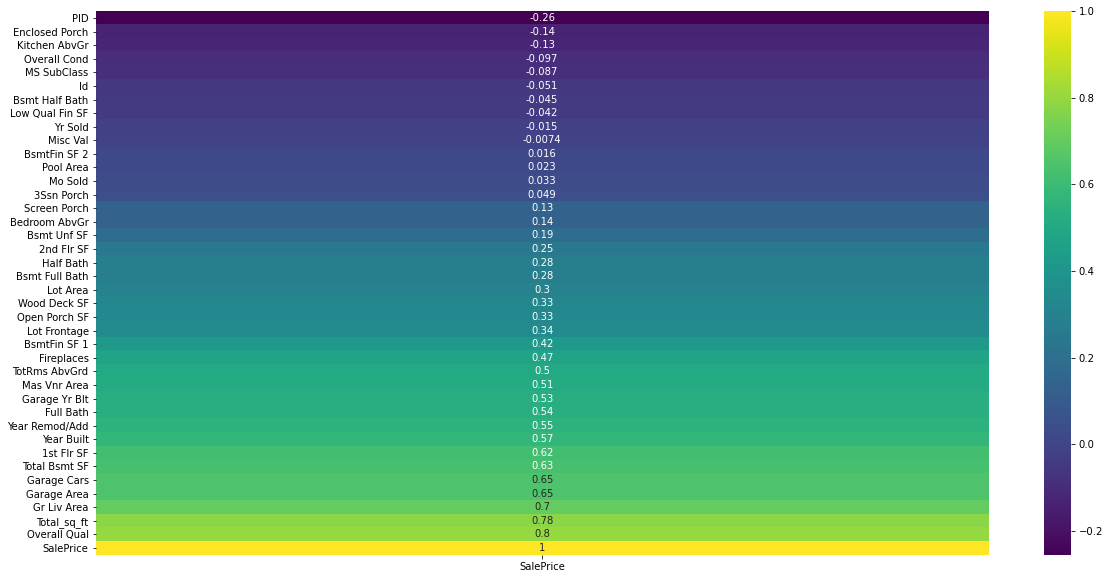

In [1060]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap='viridis')
plt.savefig('features-corelation heatmap.png')

In [1001]:
train_df['Total Bsmt SF'].fillna(0, inplace =True)

In [1002]:
train_df['Total Bsmt SF'].isnull().sum()

0

In [1003]:
train_df['Garage Cars'].isnull().sum()





1

In [1004]:
train_df['Garage Cars'].fillna(0, inplace=True)

In [1005]:
train_df['Garage Area'].fillna(0, inplace=True)

In [1006]:
train_df['Gr Liv Area'].fillna(0, inplace=True)

In [1007]:
train_df['Wood Deck SF'].isnull().sum()

0

In [1008]:
train_df['Year Remod/Add'].isnull().sum()

0

In [1009]:
train_df['Total Bsmt SF'] , train_df['1st Flr SF'], train_df['2nd Flr SF']

(0        725.0
 1        913.0
 2       1057.0
 3        384.0
 4        676.0
          ...  
 2046    1884.0
 2047     861.0
 2048     896.0
 2049    1200.0
 2050     994.0
 Name: Total Bsmt SF, Length: 2051, dtype: float64,
 0        725
 1        913
 2       1057
 3        744
 4        831
         ... 
 2046    1728
 2047     861
 2048    1172
 2049    1200
 2050    1028
 Name: 1st Flr SF, Length: 2051, dtype: int64,
 0        754
 1       1209
 2          0
 3        700
 4        614
         ... 
 2046       0
 2047       0
 2048     741
 2049       0
 2050     776
 Name: 2nd Flr SF, Length: 2051, dtype: int64)

In [1010]:
#adding a new feature total SQ FT 
train_df['Total_sq_ft']=train_df['Total Bsmt SF']+train_df['1st Flr SF']+train_df['2nd Flr SF']

In [1011]:
train_df['Total_sq_ft']

0       2204.0
1       3035.0
2       2114.0
3       1828.0
4       2121.0
         ...  
2046    3612.0
2047    1722.0
2048    2809.0
2049    2400.0
2050    2798.0
Name: Total_sq_ft, Length: 2051, dtype: float64

In [1012]:
train_df.head()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Total_sq_ft
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,2204.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,3035.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,2114.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,1828.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,2121.0


In [1013]:
train_df['Bsmt Full Bath'].fillna(0,inplace=True)

In [1014]:
train_df['Bsmt Full Bath'].isnull().sum()

0

In [1015]:
#Picking few features with highest co-relation from dataset for model based on above plot
features = ['Lot Area','Overall Qual','1st Flr SF','2nd Flr SF','Total Bsmt SF','Year Built','Full Bath','Bedroom AbvGr','Gr Liv Area','Garage Area','Garage Cars','Wood Deck SF','Total_sq_ft','Year Remod/Add','Bsmt Full Bath']
X=train_df[features]
y=train_df['SalePrice']

In [1016]:
lr=LinearRegression()

In [1017]:
cross_val_score(lr , X , y ).mean()

0.7971584144961522

In [1018]:
cross_val_score(lr , X , y)

array([0.82258086, 0.84002361, 0.71590673, 0.85609355, 0.75118732])

In [1019]:
# Instantiate PolynomialFeatures
poly=PolynomialFeatures(include_bias=False)

In [1020]:
X_poly = poly.fit_transform(X)


In [1021]:
cross_val_score(lr,X_poly,y).mean()

0.8576755701179621

In [1022]:
X_train, X_test , y_train , y_test=train_test_split(X_poly,y ,test_size=0.1,random_state=42) 
lr.fit(X_train, y_train)

LinearRegression()

In [1023]:
lr.score(X_train , y_train) , lr.score(X_test, y_test)

(0.910760376403491, 0.8943478002915064)

In [1024]:
y_preds=lr.predict(X_test)

In [1067]:
y_preds.shape

(206,)

In [1025]:
lr.coef_

array([-4.86048152e+01,  4.47051960e+04,  3.80248723e+03,  3.74181019e+03,
       -3.83441131e+03,  2.04986968e+04, -6.14290780e+05,  3.45736787e+05,
       -8.30230801e+03, -6.57679861e+02,  1.79922564e+05,  2.37540867e+02,
        3.70991723e+03, -5.25405338e+04, -2.85253123e+05, -1.43930374e-05,
        1.55164999e-01, -2.89003321e-03, -3.25171085e-03,  2.38195875e-03,
        9.16701883e-03, -3.29797827e-01,  1.08443667e-01,  4.86069648e-03,
       -1.42251840e-03,  4.14676248e-01, -2.01767922e-04, -2.03424785e-03,
        1.61012094e-02, -2.69297332e-01, -6.20956559e+02,  5.32190798e+00,
       -1.61711286e+00,  2.63049439e+00,  9.46585429e+00, -3.41625449e+03,
       -3.24995554e+03,  1.02888916e+01,  1.02432674e+01, -1.06514961e+03,
       -4.20616050e+00,  6.33527091e+00, -3.49544755e+01, -5.14068174e+02,
        8.93279602e-02,  1.07943015e-01, -8.55919126e-02, -6.63741234e-01,
        1.08640277e+01,  4.48915843e+00, -2.78382152e-01,  3.44460630e-02,
       -4.95117614e+00,  

In [1063]:
list(zip(X.columns, lr.coef_))

[('Lot Area', -48.604815171176554),
 ('Overall Qual', 44705.1960148833),
 ('1st Flr SF', 3802.4872289198643),
 ('2nd Flr SF', 3741.810194591539),
 ('Total Bsmt SF', -3834.411309255544),
 ('Year Built', 20498.69676398044),
 ('Full Bath', -614290.7797889019),
 ('Bedroom AbvGr', 345736.7865048784),
 ('Gr Liv Area', -8302.308014638376),
 ('Garage Area', -657.6798609152339),
 ('Garage Cars', 179922.56397965524),
 ('Wood Deck SF', 237.54086716745678),
 ('Total_sq_ft', 3709.917234405921),
 ('Year Remod/Add', -52540.53383965394),
 ('Bsmt Full Bath', -285253.1232857762)]

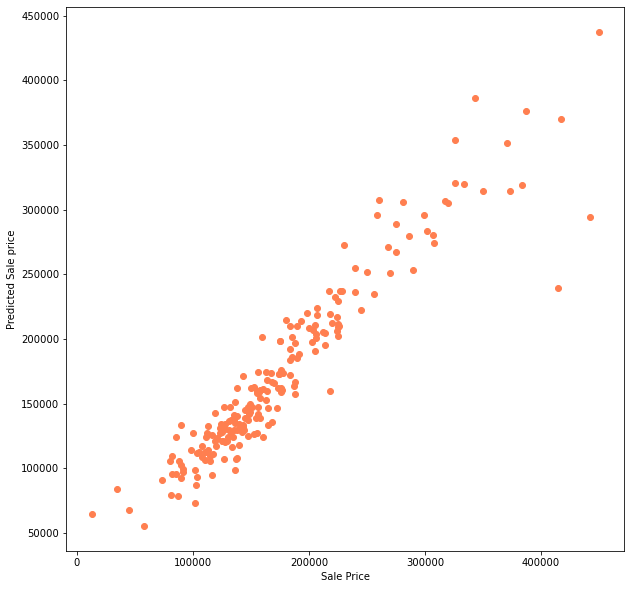

In [1064]:
plt.figure(figsize = (10, 10))


#plt.scatter(y_test,y_preds,s=1, c=colormap )
plt.scatter(y_test,y_preds, c='coral')
#plt.scatter(y_test,y_preds, c='lightblue', label='Predicted Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Predicted Sale price')
plt.savefig('YvsPredY.png')

In [1030]:
#'Garage Area','Garage Cars'
test_df['Garage Cars'].isnull().sum()

0

In [1031]:
test_df['Total_sq_ft']=test_df['Total Bsmt SF']+test_df['1st Flr SF']+test_df['2nd Flr SF']

In [1032]:
test_df.shape

(878, 81)

In [1033]:

test_df['Bsmt Full Bath'].isnull().sum()

0

In [1034]:
X_test=test_df[features]


In [1035]:
X_test_poly=poly.fit_transform(X_test)


In [ ]:
#Xs_final=sc.transform(X_test_poly)

In [1039]:
test_df['y_hat']=lr.predict(X_test_poly)


In [1040]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Total_sq_ft,y_hat
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,2948,145337.538133
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,3934,152929.938293
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2006,New,2150,193906.061055
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2007,WD,1936,129748.676596
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,2788,175873.782263


In [1041]:
test_df.shape

(878, 82)

In [1042]:
submission_df=pd.read_csv('./datasets/sample_sub_reg.csv')

In [1043]:
submission_df.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [1044]:
submission_df.shape

(878, 2)

In [1045]:
submission=pd.DataFrame({'Id' : test_df['Id'],
                         'SalePrice' : test_df['y_hat'] })

In [1046]:
submission.head()

,Id,SalePrice
0,2658,145337.538133
1,2718,152929.938293
2,2414,193906.061055
3,1989,129748.676596
4,625,175873.782263


In [1047]:
submission.shape

(878, 2)

In [1048]:
submission.to_csv('my_fifth_submission.csv',index=False)